In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For reproducibility
np.random.seed(777)

In [3]:
# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
intercept = 2.

# outputs
y = x * slopes + intercept

In [4]:
slopes

array([ 0.76589561,  0.58858758,  0.96730995,  0.64331901,  1.45317543,
        1.38311839,  1.41302705,  0.33815861,  0.12377774,  1.50122452,
        1.27240467,  1.94758046,  0.61532128,  0.29845205,  0.68376625,
        0.72056317,  0.38338432,  0.78024822,  1.45739365,  1.13252044,
        0.30831492,  1.34275591,  1.22804546,  0.76931286,  1.04735017,
        0.2285942 ,  2.23968482,  1.22843337,  0.84306359,  1.01051867,
        1.48039663,  1.02924144,  0.77698392,  1.15959859,  1.42058432,
        0.233619  ,  0.85920787,  1.87222636,  0.66288054,  1.29420066,
        1.90218174,  2.02812505,  1.72729087,  0.93079418,  1.17143595,
        0.63619077,  0.29802695,  0.3796944 ,  0.77825892,  0.97633743,
        1.37884223,  0.92395705,  0.86436051,  0.70008004, -0.01345206,
        1.16517115,  0.83458447,  0.98252892,  1.14487398,  0.69686502,
        0.86579788,  1.59573877,  1.07880664,  1.58741236,  1.66045499,
        0.57598138,  1.37285376,  0.84418935,  0.47446731,  0.46

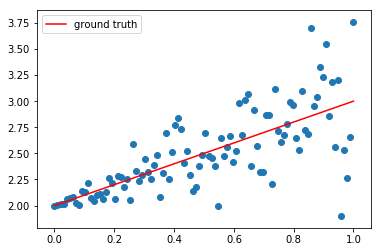

In [5]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [6]:
x.dtype

dtype('float32')

In [7]:
y.dtype

dtype('float32')

In [8]:
x.shape

(100,)

In [9]:
y.shape

(100,)

In [10]:
# Inputs
x_pl = tf.placeholder(tf.float32, [100,], name="x_pl")
y_pl = tf.placeholder(tf.float32, [100,], name="y_pl")

In [11]:
# Computation
## Variables = Parameters = Weights
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [12]:
## prediction = y_hat = hypothesis
preds = x_pl * w + b # (100,)

In [13]:
# objective = loss = cost
loss = tf.reduce_mean(tf.square(preds - y)) # L2 loss

In [14]:
# Optimization = Training
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
train_op = optimizer.minimize(loss)

In [15]:
# start a session
sess = tf.Session()

In [16]:
# initialize all variables
sess.run(tf.global_variables_initializer())

In [17]:
loss_list, w_list, b_list = [], [], []
for epoch in range(20):
    _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x_pl:x, y_pl:y})
    print(epoch+1, "\t", _loss, "\t", _w, "\t", _b)
    loss_list.append(_loss)
    w_list.append(_w)
    b_list.append(_b)

1 	 6.17397 	 0.1 	 0.0
2 	 3.47361 	 0.360818 	 0.491142
3 	 1.96916 	 0.555045 	 0.857975
4 	 1.13098 	 0.699576 	 1.13202
5 	 0.663994 	 0.807018 	 1.3368
6 	 0.403808 	 0.886784 	 1.48988
7 	 0.258835 	 0.945896 	 1.60437
8 	 0.178052 	 0.989599 	 1.69005
9 	 0.13303 	 1.02181 	 1.75422
10 	 0.107931 	 1.04544 	 1.80234
11 	 0.0939337 	 1.06267 	 1.83847
12 	 0.0861207 	 1.07514 	 1.86565
13 	 0.0817538 	 1.08406 	 1.88615
14 	 0.0793071 	 1.09032 	 1.90166
15 	 0.0779306 	 1.09462 	 1.91343
16 	 0.0771506 	 1.09745 	 1.92243
17 	 0.0767034 	 1.0992 	 1.92934
18 	 0.0764419 	 1.10013 	 1.93469
19 	 0.0762841 	 1.10047 	 1.93888
20 	 0.0761845 	 1.10036 	 1.9422


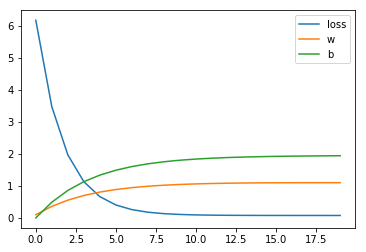

In [18]:
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()